# Regressin Project

برای این پروژه ما اطلاعات تقریبا ۴۰۰۰ آپارتمان در تهران را تهیه کرده ایم. تمامی داده ها کاملا واقعی هستند. وظیفه شما این است که با استفاده از ویژگی های دیتاست که در ادامه به تشریح آنها پرداخته‌ایم قیمت به دلار یا تومان را تخمین بزنید. داده ها درون فایل housePrice.csv ذخیره شده اند.

متراژ خانه به متر (Area)
تعداد اتاق خواب (Room)
پارکینگ دارد یا خیر (Parking)
انباری دارد یا خیر (Warehouse)
آسانسور دارد یا خیر (Elevator)
آدرس حدودی در تهران (Address)
قیمت به تومان (Price)
قیمت به دلار (Price(USD))
در این دیتاست بعضی از خانه ها آدرس ندارند و همینطور متراژ بعضی از خانه ها اشتباه وارد شده (مقدار بسیار بزرگی دارند). به این منظور این موارد را نیز باید مدیریت کنید و آن ها را از دیتاست خود حذف کنید.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('housePrice.csv')
df.head() #    3479

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


### clean the data

In [3]:
df.dropna(subset=['Address'], inplace=True)
df['Area'] = df['Area'].str.replace(',', '').astype(int)
new_columns = {"Price(USD)": "PriceUSD"}
df = df.rename(columns=new_columns)
df = df[df['Area'] <= 400]
df = df[df['Area'] >= 30]
df = df[df['PriceUSD'] <= 1000000]
df = df[df['Price'] >= 1500000000]
df["Price"] = df["Price"].astype('int64')
df["PriceUSD"] = df["PriceUSD"].astype('int64')
df.head()    # 2464

,Area,Room,Parking,Warehouse,Elevator,Address,Price,PriceUSD
0,63,1,True,True,True,Shahran,1850000000,61666
1,60,1,True,True,True,Shahran,1850000000,61666
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333
5,70,2,True,True,False,North Program Organization,2050000000,68333
7,59,1,True,True,True,Shahran,2150000000,71666


### plot area and price(usd)

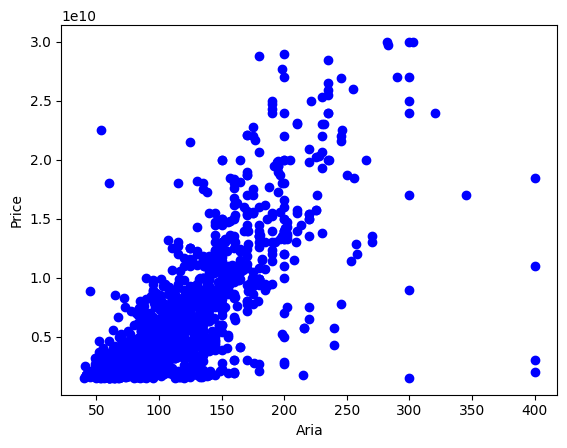

In [4]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

plt.scatter(train.Area, train.Price, color='blue')
plt.xlabel("Aria")
plt.ylabel("Price")
plt.show()

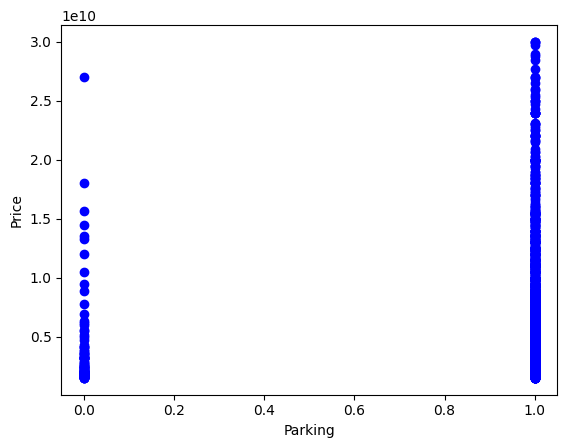

In [5]:
plt.scatter(train.Parking, train.Price, color='blue')
plt.xlabel("Parking")
plt.ylabel("Price")
plt.show()

### simple linear regression

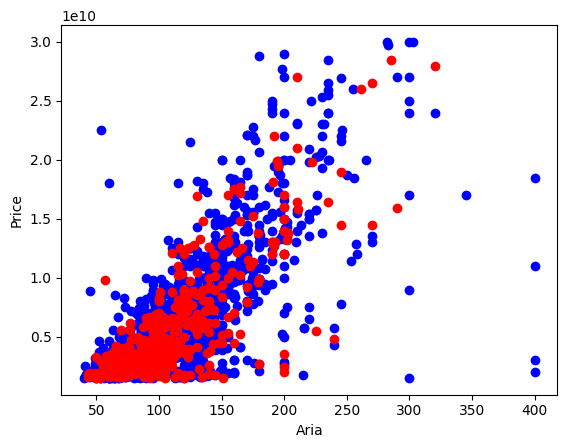

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.Area, train.Price, color='blue')
ax1.scatter(test.Area, test.Price, color='red')
plt.xlabel("Aria")
plt.ylabel("Price")
plt.show()

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[82598601.98815362]]
Intercept:  [-3.14866825e+09]


Text(0, 0.5, 'Price')

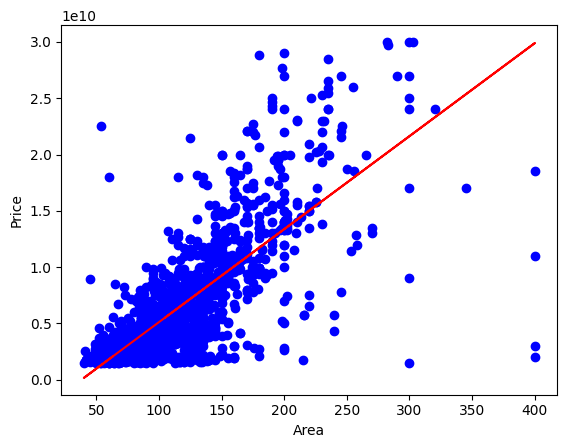

In [8]:
plt.scatter(train.Area, train.Price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Area")
plt.ylabel("Price")

In [9]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

my_test = regr.predict(np.array([[102]]))
print('\n', int(my_test))

Mean absolute error: 1884643213.33
Residual sum of squares (MSE): 7764038602408435712.00
R2-score: 0.64

 5276389151


/tmp/ipykernel_23112/1076393886.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('\n', int(my_test))


### multiple linear regression

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])
train_y = np.asanyarray(train[['Price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 8.51990051e+07 -2.79214237e+08 -4.65265924e+07  5.51491565e+08
   1.46270302e+09]]
Intercept:  [-4.564078e+09]


In [11]:
y_hat= regr.predict(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])
x = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])
y = np.asanyarray(test[['Price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 7706634561218930688.00
Variance score: 0.64


/home/niknam1382/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Transform data for address

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['Address'])
len(label)    # 3365
df.drop("Address", axis=1, inplace=True)
df["Address"] = label
df.head()

,Area,Room,Parking,Warehouse,Elevator,Price,PriceUSD,Address
0,63,1,True,True,True,1850000000,61666,126
1,60,1,True,True,True,1850000000,61666,126
4,123,2,True,True,True,7000000000,233333,121
5,70,2,True,True,False,2050000000,68333,86
7,59,1,True,True,True,2150000000,71666,126


In [13]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']])
train_y = np.asanyarray(train[['Price']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 9.22628297e+07 -6.79341109e+08  4.50294841e+07  3.64271882e+08
   1.36875104e+09  2.35248247e+06]]
Intercept:  [-4.49478033e+09]


In [14]:
y_hat= regr.predict(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']])
x = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']])
y = np.asanyarray(test[['Price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 10086415156988010496.00
Variance score: 0.54


/home/niknam1382/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### plymonial

In [15]:
from sklearn.preprocessing import PolynomialFeatures
# from sklearn import linear_model
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])

test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x).astype(int)
train_x_poly

array([[    1,    63,  3969],
       [    1,    60,  3600],
       [    1,   123, 15129],
       ...,
       [    1,    86,  7396],
       [    1,    83,  6889],
       [    1,   105, 11025]])

In [16]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  1.00457060e+08 -5.51079102e+04]]
Intercept:  [-4.32349544e+09]


Text(0, 0.5, 'Price')

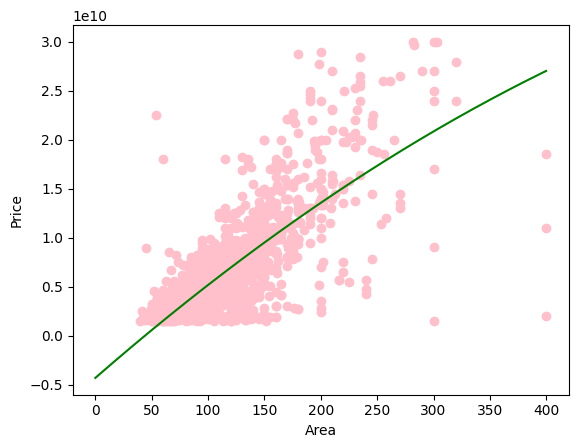

In [17]:
plt.scatter(train.Area, train.Price,  color='pink')
XX = np.arange(0.0, 400.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-g' )
plt.xlabel("Area")
plt.ylabel("Price")

In [18]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 1975359502.23
Residual sum of squares (MSE): 9609093629565702144.00
R2-score: 0.56


### None linear ( scurve )

In [19]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [20]:
x_data, y_data = (df["Area"].values, df["Price"].values)
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [21]:
'''beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, Y_pred*15000000000000.)'''

"beta_1 = 0.10\nbeta_2 = 1990.0\n\n#logistic function\nY_pred = sigmoid(x_data, beta_1 , beta_2)\n\n#plot initial prediction against datapoints\nplt.plot(x_data, y_data, 'ro')\nplt.plot(x_data, Y_pred*15000000000000.)"

In [22]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 6.686803, beta_2 = 0.504453


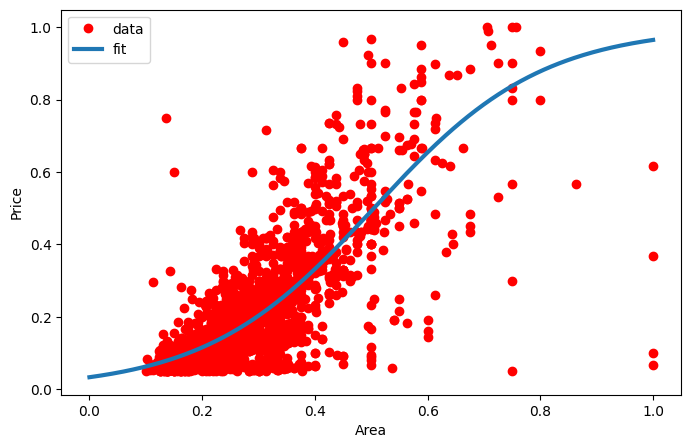

335.118591530348


In [23]:
x = np.linspace(0, 300, 300)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Price')
plt.xlabel('Area')
plt.show()

test = 300
t = test / max(x_data)
print(sigmoid(t, *popt) * max(x_data))

In [24]:
from sklearn.metrics import r2_score

y_pred = sigmoid(xdata, *popt)
r2 = r2_score(ydata, y_pred)
print("R-squared score: ", r2)

R-squared score:  0.6241413606224646
